# Instructions
The following Cells need to be executed.

They are used to download and generate a dataset that has an aggregated count of bike trips per hundredth of an hour through the 24 hours in a day. 

The assignment is in the last cell.

## This cell automatically downloads Capital Bikeshare data

### And here we read in the data

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 20, 10
import pandas as pd
import numpy as np
bikes = pd.read_csv('bikeshare.csv.gz')
bikes.head()
bikes['start'] = pd.to_datetime(bikes['Start date'], infer_datetime_format=True)
bikes['end'] = pd.to_datetime(bikes['End date'], infer_datetime_format=True)
bikes["dur"] = (bikes['Duration (ms)']/1000).astype(int)
bikes.head()

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type,start,end,dur
0,301295,3/31/2016 23:59,4/1/2016 0:04,31280,11th & S St NW,31506,1st & Rhode Island Ave NW,W00022,Registered,2016-03-31 23:59:00,2016-04-01 00:04:00,301
1,557887,3/31/2016 23:59,4/1/2016 0:08,31275,New Hampshire Ave & 24th St NW,31114,18th St & Wyoming Ave NW,W01294,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00,557
2,555944,3/31/2016 23:59,4/1/2016 0:08,31101,14th & V St NW,31221,18th & M St NW,W01416,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00,555
3,766916,3/31/2016 23:57,4/1/2016 0:09,31226,34th St & Wisconsin Ave NW,31214,17th & Corcoran St NW,W01090,Registered,2016-03-31 23:57:00,2016-04-01 00:09:00,766
4,139656,3/31/2016 23:57,3/31/2016 23:59,31011,23rd & Crystal Dr,31009,27th & Crystal Dr,W21934,Registered,2016-03-31 23:57:00,2016-03-31 23:59:00,139


In [2]:
bikes.dur.mean()

992.8716543657755

In [3]:
bikes.dur.std()

2073.9809135296514

In [4]:
bikes[bikes.dur>16000].shape

(973, 12)

In [5]:
plt.rcParams['figure.figsize'] = 20, 10

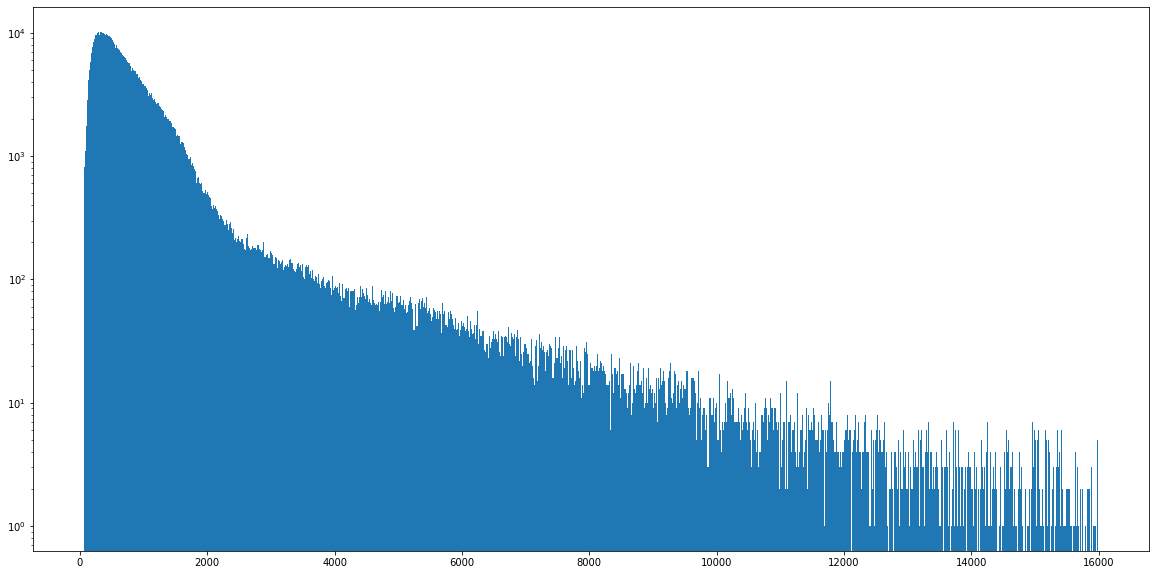

In [6]:
_=plt.hist(bikes[bikes.dur<16000].dur, log=True, bins=1000)

In [7]:
short = bikes[bikes.dur<16000]

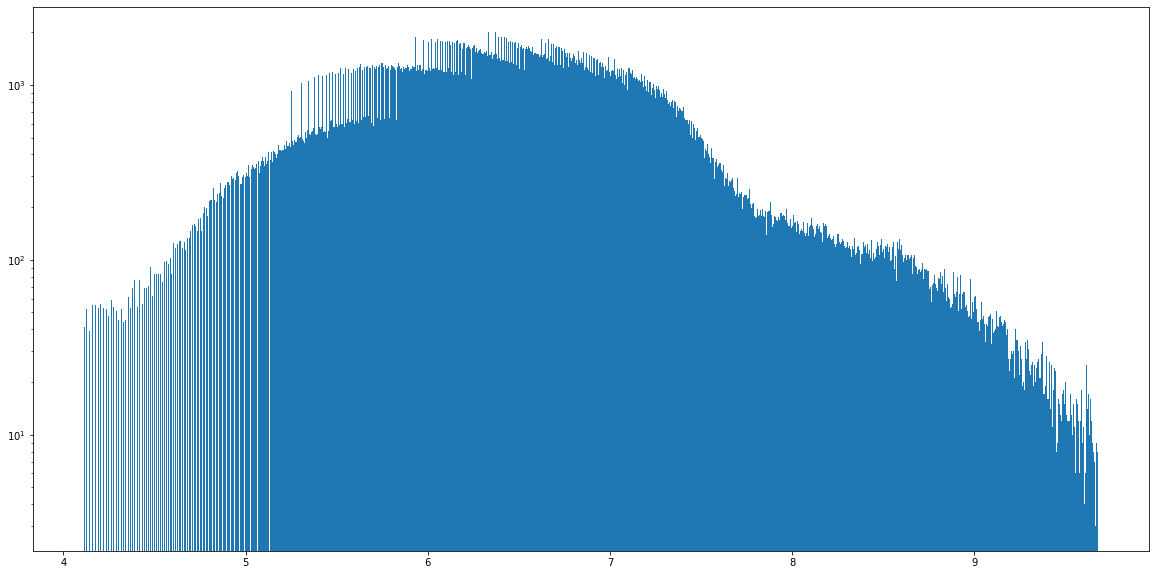

In [8]:
_=plt.hist(np.log1p(short.dur), log=True, bins=1000)

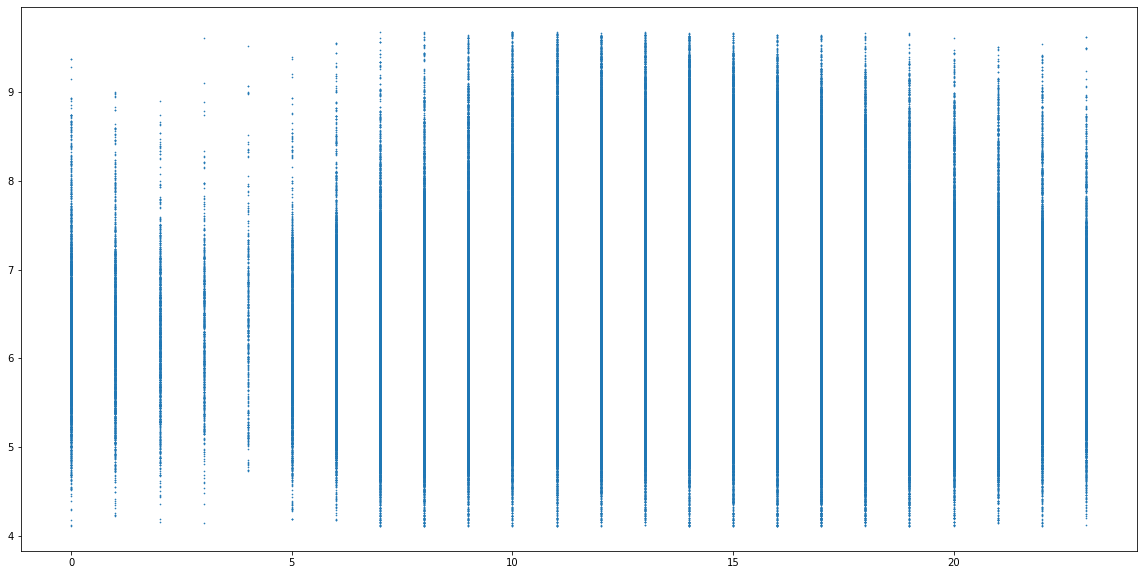

In [9]:
plt.scatter(short.start.dt.hour, np.log1p(short.dur), s=.4)

In [10]:
np.log1p(0), np.log(0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


(0.0, -inf)

In [11]:
bikes['log_dur'] = np.round(np.log1p(bikes.dur), 1)

In [12]:
monday = bikes[bikes.start.dt.dayofweek==1]

In [13]:
dur_hour = monday.groupby(['log_dur', monday.start.dt.hour]).count()

In [14]:
dur_hour

Duration (ms)  Start date  End date  Start station number  \
log_dur start                                                              
4.1     7                  1           1         1                     1   
        9                  2           2         2                     2   
        11                 1           1         1                     1   
        14                 2           2         2                     2   
        16                 2           2         2                     2   
...                      ...         ...       ...                   ...   
11.2    21                 2           2         2                     2   
11.3    14                 1           1         1                     1   
        17                 1           1         1                     1   
        19                 1           1         1                     1   
11.4    18                 1           1         1                     1   

               Start station  End station number  End station  Bike number  \
log_dur start                                                                
4.1     7                  1                   1            1            1   
        9                  2                   2            2            2   
        11                 1                   1            1            1   
        14                 2                   2            2            2   
        16                 2                   2            2            2   
...                      ...                 ...          ...          ...   
11.2    21                 2                   2            2            2   
11.3    14                 1                   1            1            1   
        17                 1                   1            1            1   
        19                 1                   1            1            1   
11.4    18                 1                   1            1            1   

               Member Type  start  end  dur  
log_dur start                                
4.1     7                1      1    1    1  
        9                2      2    2    2  
        11               1      1    1    1  
        14               2      2    2    2  
        16               2      2    2    2  
...                    ...    ...  ...  ...  
11.2    21               2      2    2    2  
11.3    14               1      1    1    1  
        17               1      1    1    1  
        19               1      1    1    1  
11.4    18               1      1    1    1  

[1184 rows x 12 columns]

In [15]:
duration_hour = dur_hour.start.unstack().T.fillna(0)
duration_hour

log_dur,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0,...,10.5,10.6,10.7,10.8,10.9,11.0,11.1,11.2,11.3,11.4
start,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,1.0,4.0,1.0,7.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,2.0,1.0,2.0,4.0,9.0,11.0,21.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,5.0,4.0,1.0,5.0,12.0,25.0,31.0,46.0,46.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,3.0,2.0,6.0,7.0,11.0,22.0,52.0,68.0,79.0,...,4.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


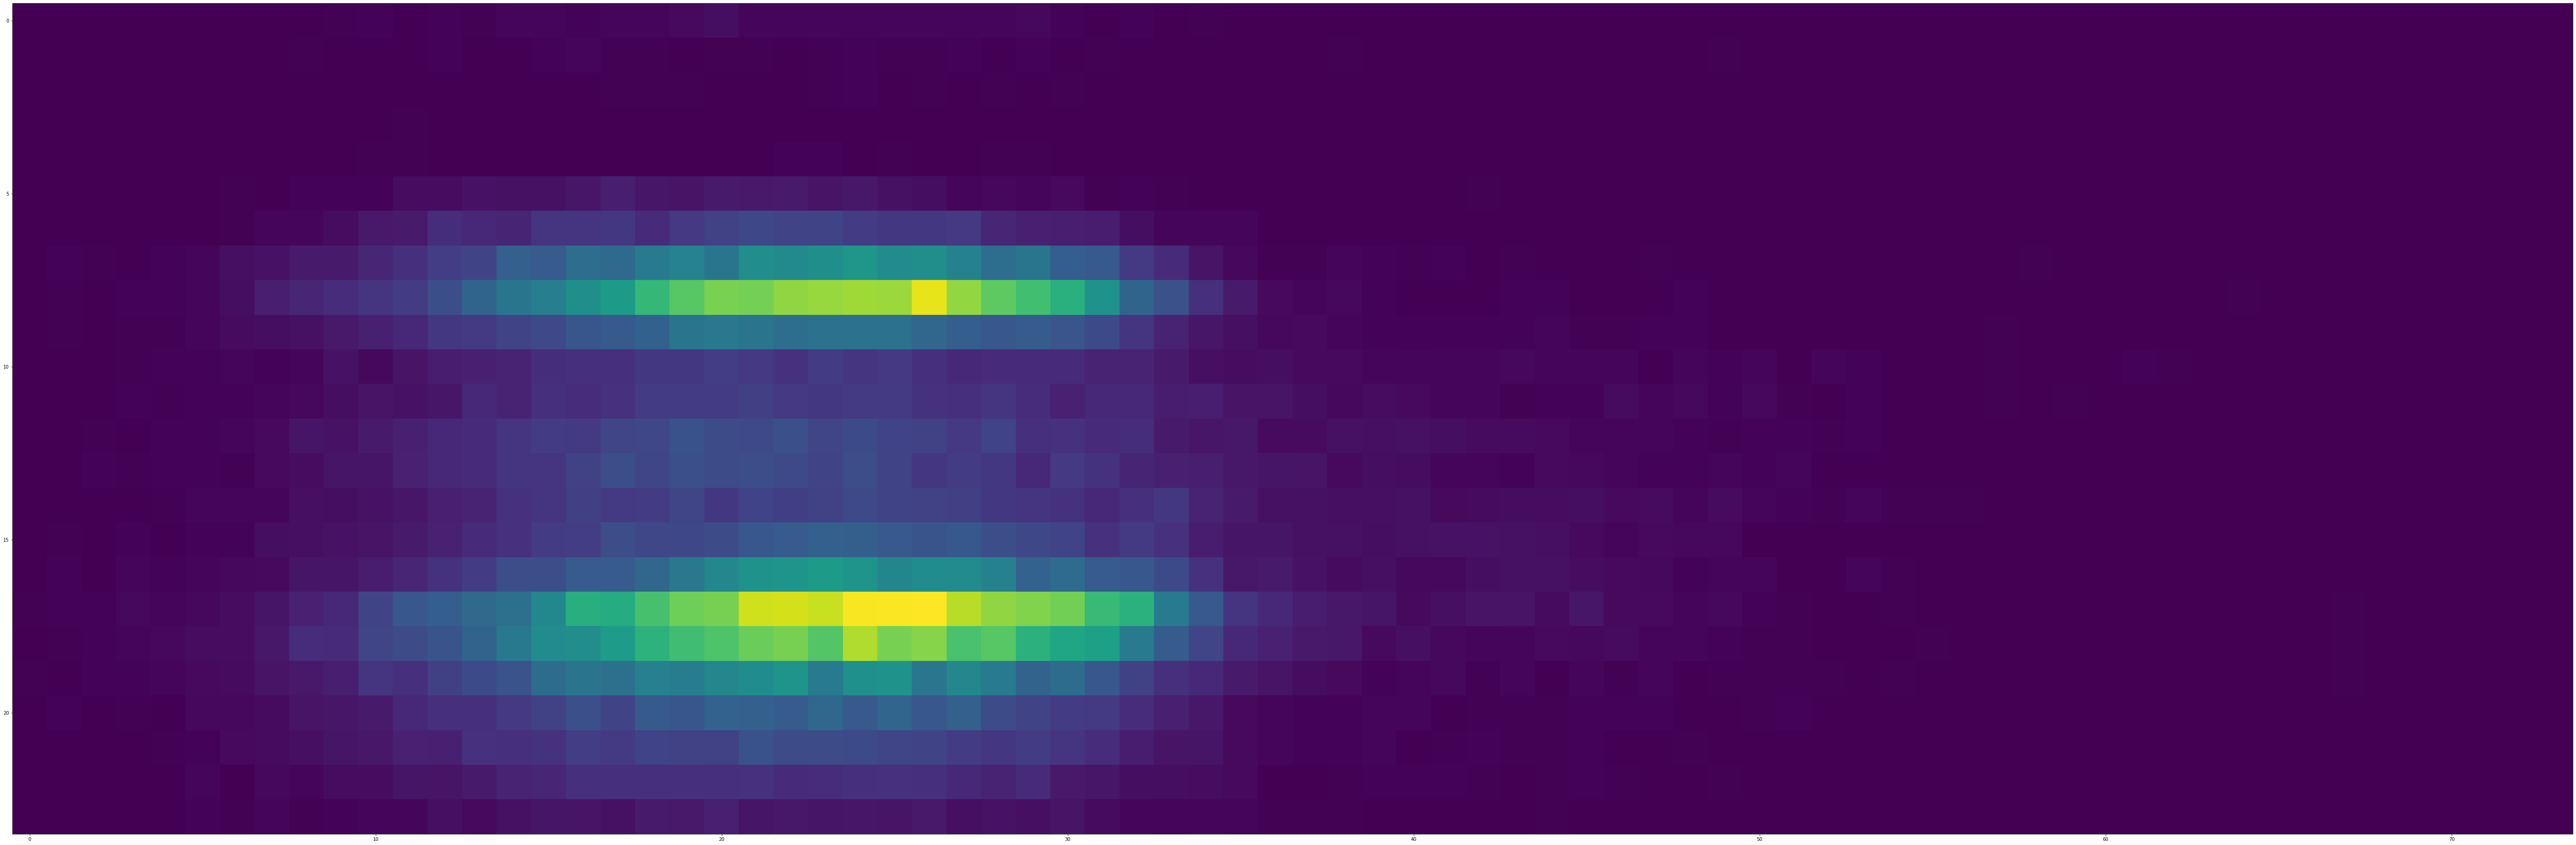

In [16]:
plt.figure(figsize=(100,100))
plt.imshow(duration_hour)

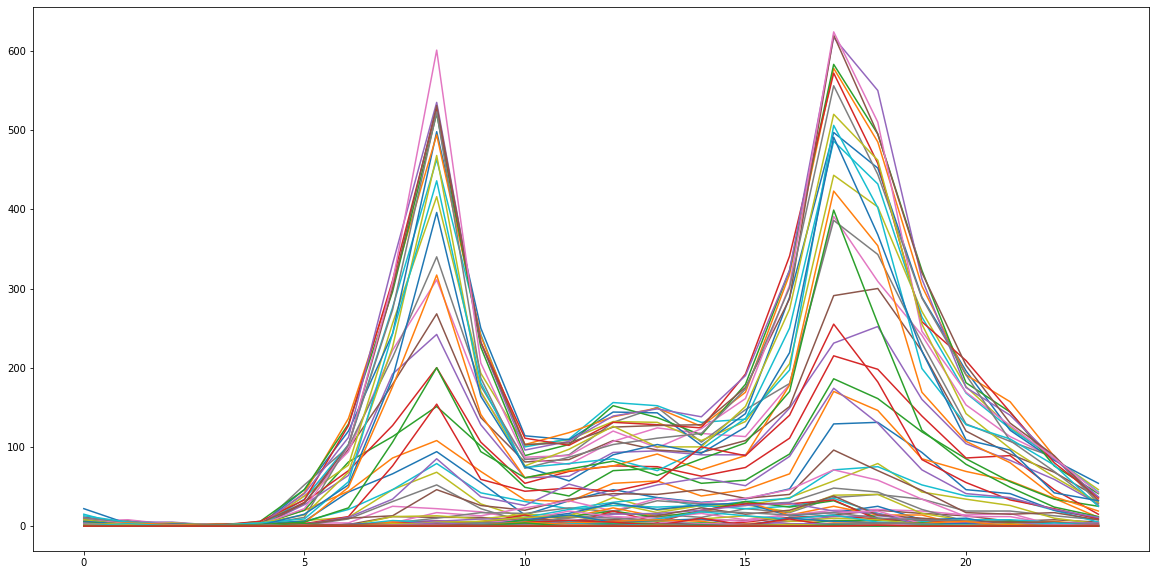

In [17]:
_=plt.plot(duration_hour)

In [18]:
bikes['Member Type'].value_counts()

Registered    467432
Casual         84967
Name: Member Type, dtype: int64

### Create a new column that represents the hour+minute of the day as a fraction (i.e. 1:30pm = 13.5)

In [19]:
np.round(.65, 1)

0.6

In [20]:
37//6, (37//6)/10, 37/60

(6, 0.6, 0.6166666666666667)

In [21]:
bikes['hour_of_day'] = (bikes.start.dt.hour + (bikes.start.dt.minute//6)/10)

In [22]:
bikes['roundhour_of_day'] = (bikes.start.dt.hour ) # keep the hour handy as well

### Aggregate to get a count per hour/minute of the day across all trips

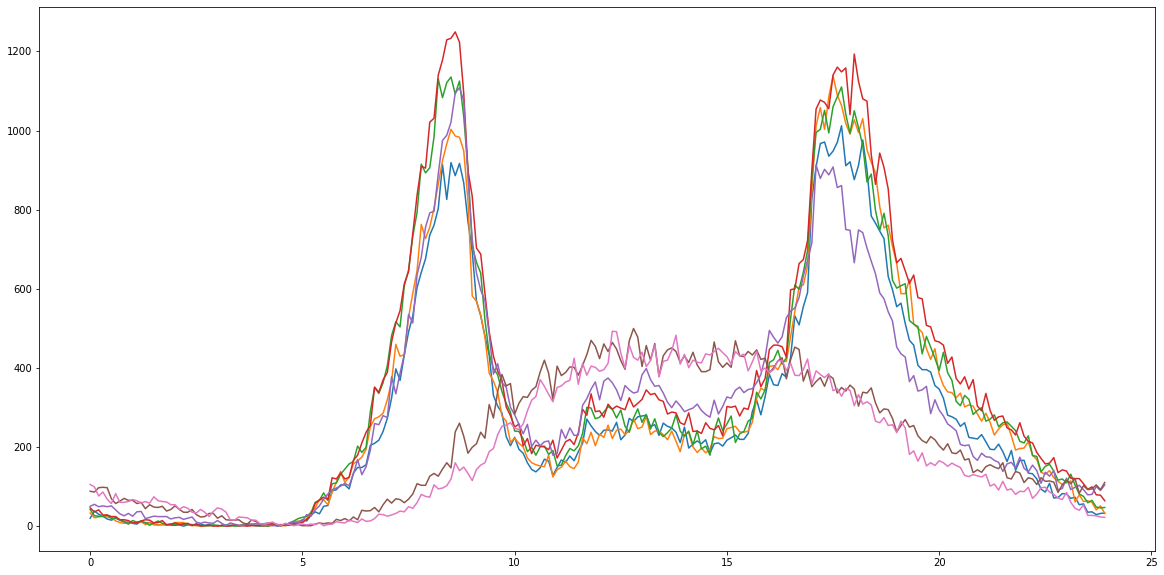

In [23]:
reg_bikes = bikes[bikes['Member Type']=='Registered']
hours = reg_bikes.groupby([reg_bikes.hour_of_day, reg_bikes.start.dt.dayofweek]).agg('count')
hours['hour'] = hours.index
day_hour_count = hours.dur.unstack()
plt.figure(figsize=(20,10))
plt.plot(day_hour_count.index, day_hour_count[0])
plt.plot(day_hour_count.index, day_hour_count[1])
plt.plot(day_hour_count.index, day_hour_count[2])
plt.plot(day_hour_count.index, day_hour_count[3])
plt.plot(day_hour_count.index, day_hour_count[4])
plt.plot(day_hour_count.index, day_hour_count[5])
plt.plot(day_hour_count.index, day_hour_count[6])

In [24]:
day_hour_count

start,0,1,2,3,4,5,6
hour_of_day,,,,,,,
0.0,21.0,34.0,43.0,47.0,51.0,89.0,106.0
0.1,39.0,22.0,27.0,37.0,56.0,87.0,100.0
0.2,31.0,24.0,26.0,42.0,50.0,98.0,77.0
0.3,26.0,27.0,25.0,29.0,52.0,99.0,87.0
0.4,19.0,24.0,29.0,29.0,50.0,98.0,69.0
...,...,...,...,...,...,...,...
23.5,36.0,65.0,60.0,94.0,80.0,93.0,28.0
23.6,37.0,61.0,66.0,100.0,81.0,95.0,28.0
23.7,30.0,42.0,49.0,80.0,101.0,105.0,27.0


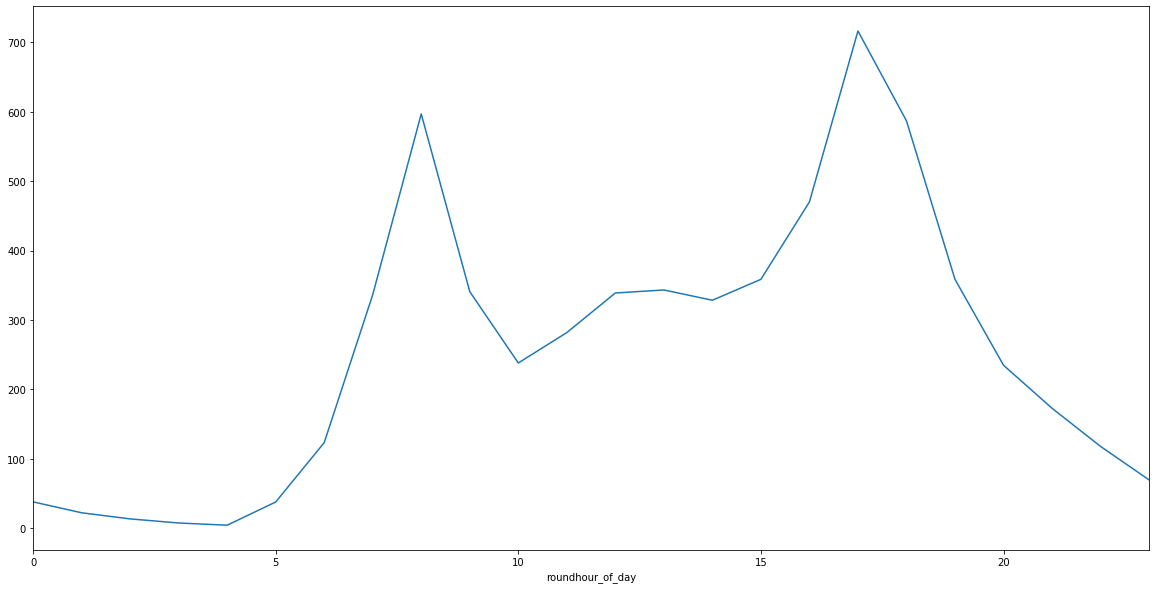

In [25]:
hoursn = bikes.groupby('roundhour_of_day').agg('count')
hoursn['hour'] = hoursn.index
(hoursn.start/90).plot() # 90 days in a quarter

In [26]:
hour_count = bikes.groupby(bikes.start.dt.dayofyear*24 + bikes.start.dt.hour).count()

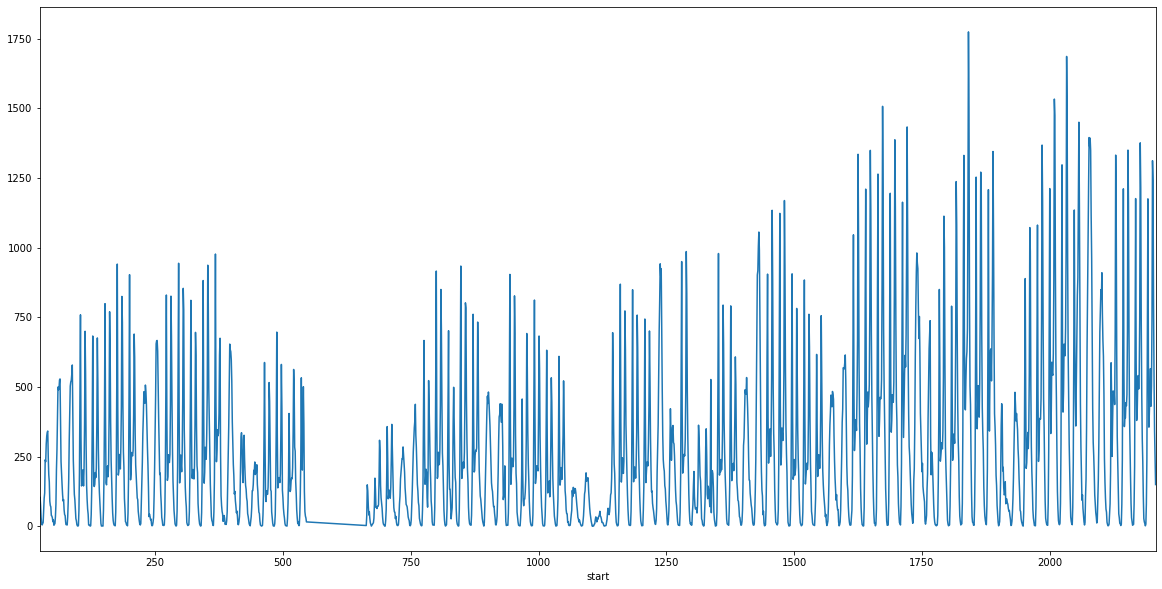

In [27]:
plt.figure(figsize=(20,10))
hour_count.start.plot()

In [28]:
day_count = bikes.groupby(bikes.start.dt.dayofyear).count()

In [29]:
day_hour = bikes.groupby([bikes.start.dt.dayofyear, bikes.start.dt.hour]).count()

In [30]:
day_hour.start.unstack()

start,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
start,,,,,,,,,,,,,,,,,,,,,
1,56.0,105.0,74.0,32.0,13.0,5.0,10.0,14.0,54.0,101.0,...,324.0,338.0,342.0,247.0,185.0,160.0,90.0,75.0,70.0,39.0
2,37.0,31.0,17.0,23.0,4.0,7.0,10.0,34.0,80.0,203.0,...,495.0,525.0,529.0,392.0,232.0,188.0,150.0,114.0,91.0,96.0
3,59.0,42.0,39.0,15.0,6.0,9.0,5.0,33.0,87.0,168.0,...,524.0,546.0,579.0,398.0,237.0,172.0,115.0,96.0,64.0,28.0
4,20.0,6.0,2.0,1.0,3.0,58.0,192.0,468.0,759.0,321.0,...,145.0,206.0,365.0,700.0,547.0,293.0,146.0,96.0,62.0,44.0
5,5.0,5.0,3.0,1.0,2.0,42.0,131.0,363.0,683.0,329.0,...,175.0,208.0,365.0,676.0,519.0,279.0,178.0,122.0,86.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,113.0,82.0,50.0,34.0,12.0,24.0,94.0,166.0,297.0,509.0,...,910.0,761.0,667.0,611.0,475.0,243.0,158.0,101.0,62.0,51.0
88,15.0,7.0,2.0,3.0,8.0,42.0,81.0,197.0,587.0,464.0,...,481.0,437.0,696.0,1332.0,1113.0,620.0,324.0,226.0,148.0,45.0
89,31.0,11.0,9.0,3.0,8.0,79.0,240.0,727.0,1211.0,564.0,...,433.0,473.0,700.0,1350.0,1159.0,700.0,400.0,279.0,178.0,82.0


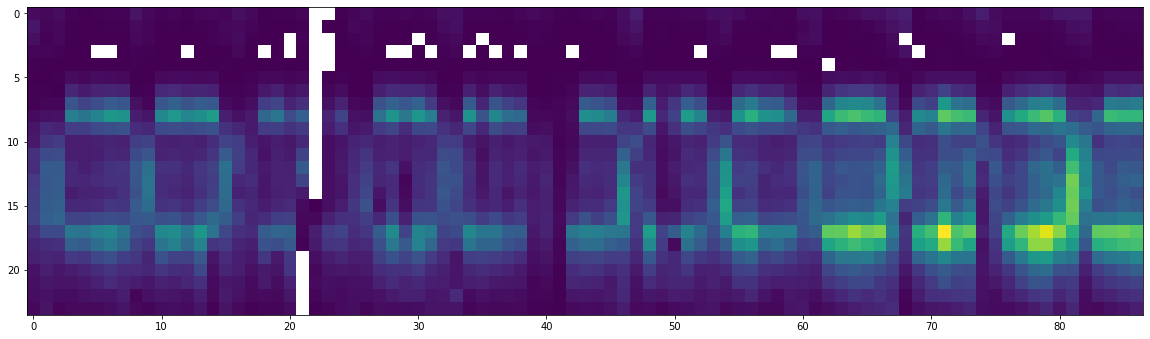

In [31]:
plt.figure(figsize=(20,10))
plt.imshow(day_hour.start.unstack().T)

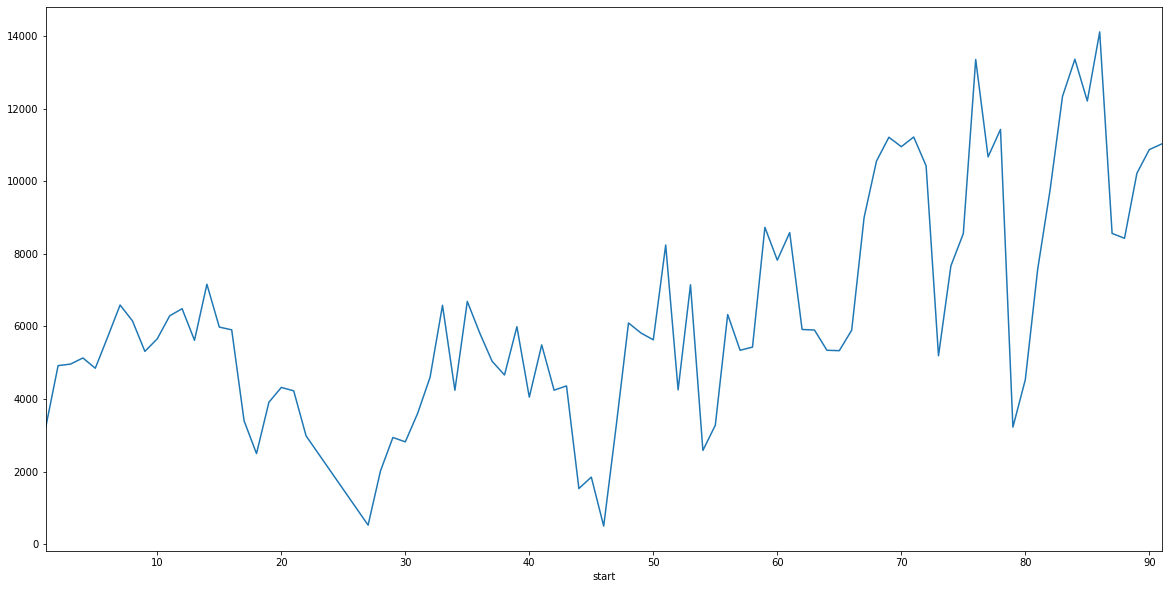

In [32]:
day_count.start.plot()

In [33]:
bikes.start.dt.dayofyear

0         91
1         91
2         91
3         91
4         91
          ..
552394     1
552395     1
552396     1
552397     1
552398     1
Name: start, Length: 552399, dtype: int64

In [34]:
bikes[bikes.start=="2016-01-10"].shape

(1, 15)

# Assignment 4


Explain the results in a **paragraph + charts** of  to describe which model you'd recommend. This means show the data and the model's line on the same chart. The paragraph is a simple justification and comparison of the several models you tried.

## 1. Using the **`day_hour_count`** dataframe create two dataframe `monday` and `saturday` that represent the data for those days. (hint: Monday is day=0)

In [35]:
day_hour_count

start,0,1,2,3,4,5,6
hour_of_day,,,,,,,
0.0,21.0,34.0,43.0,47.0,51.0,89.0,106.0
0.1,39.0,22.0,27.0,37.0,56.0,87.0,100.0
0.2,31.0,24.0,26.0,42.0,50.0,98.0,77.0
0.3,26.0,27.0,25.0,29.0,52.0,99.0,87.0
0.4,19.0,24.0,29.0,29.0,50.0,98.0,69.0
...,...,...,...,...,...,...,...
23.5,36.0,65.0,60.0,94.0,80.0,93.0,28.0
23.6,37.0,61.0,66.0,100.0,81.0,95.0,28.0
23.7,30.0,42.0,49.0,80.0,101.0,105.0,27.0


In [36]:
monday_df = day_hour_count[0]
monday_df

hour_of_day
0.0     21.0
0.1     39.0
0.2     31.0
0.3     26.0
0.4     19.0
        ... 
23.5    36.0
23.6    37.0
23.7    30.0
23.8    33.0
23.9    34.0
Name: 0, Length: 240, dtype: float64

In [37]:
saturday_df = day_hour_count[5]
saturday_df

hour_of_day
0.0      89.0
0.1      87.0
0.2      98.0
0.3      99.0
0.4      98.0
        ...  
23.5     93.0
23.6     95.0
23.7    105.0
23.8     93.0
23.9    111.0
Name: 5, Length: 240, dtype: float64


## 2a. Create 3 models fit to `monday` with varying polynomial degrees. Repeat for 

In [38]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

monday_df = pd.Series.dropna(monday_df, axis = 0)

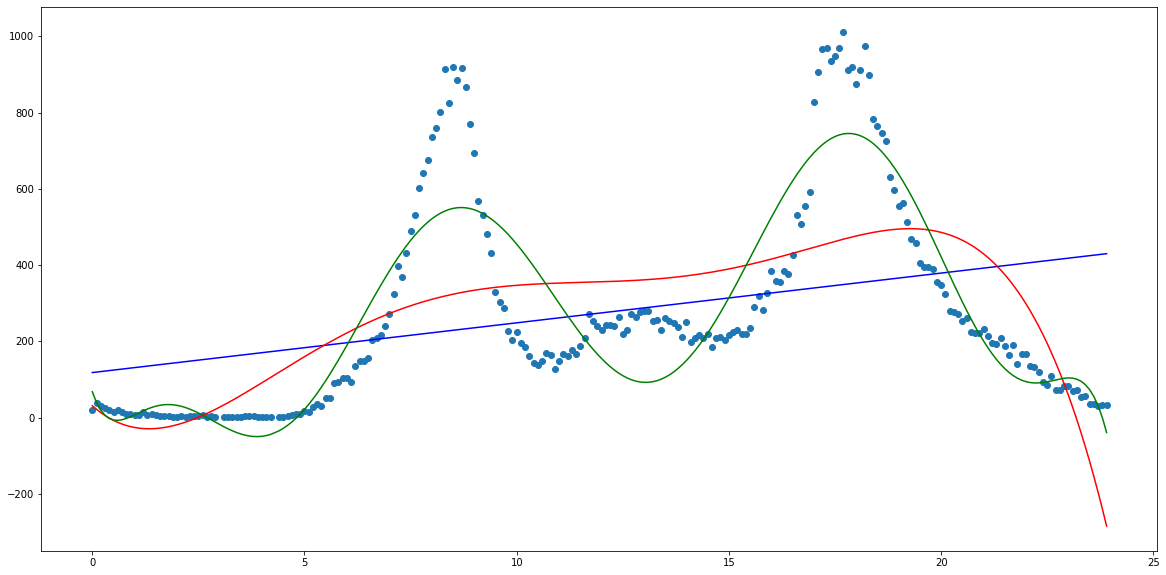

In [39]:
x = monday_df.index.values.reshape(-1,1)
y = monday_df

plt.scatter(x,y)

# Model 1 - Linear Regression

linearxy = linear_model.LinearRegression()

linearxy.fit(x, y)
linearxy.coef_, linearxy.intercept_

plt.plot(x, x*linearxy.coef_ + linearxy.intercept_, c='b')

# Model 2 - 

poly = PolynomialFeatures(degree=5)

x_5 = poly.fit_transform(x.reshape(-1, 1))

linearxy.fit(x_5, y)
(linearxy.coef_, linearxy.intercept_)

plt.plot(x, np.dot(x_5, linearxy.coef_) + linearxy.intercept_, c='r')

# Model 3 - 

poly1 = PolynomialFeatures(degree=10)

x_10 = poly1.fit_transform(x.reshape(-1, 1))

linearxy.fit(x_10, y)
(linearxy.coef_, linearxy.intercept_)

plt.plot(x, np.dot(x_10, linearxy.coef_) + linearxy.intercept_, c='g')

Of the three models tried in step 2a - linear, 5th degree polynomial, and 10th degree polynomial - the 10th degree polynomial appears to be the best fit. The Capital Bike Share data for Mondays is bimodal, peaking around the morning rush hour and then again at the evening rush hour, with a local maxima around lunch time. The simple linear model is an obviously poor fit, showing a constant increase over the course of the day that does not account for the peaks. The 5th degree polynomial better accounts for the variance in slope over time, but still doesn't clearly map to the morning and afternoon rushes. The 10th degree polynomial, while not perfect, reflects the flatness before morning rush, the peaks at commuting time, and then the decrease in the evening. Further iteration on different degrees of polynomials may further refine the model, but of those tested in this exercise, the 10th degree polynomial is the best. 

## 2b. Repeat `2a` for `saturday`

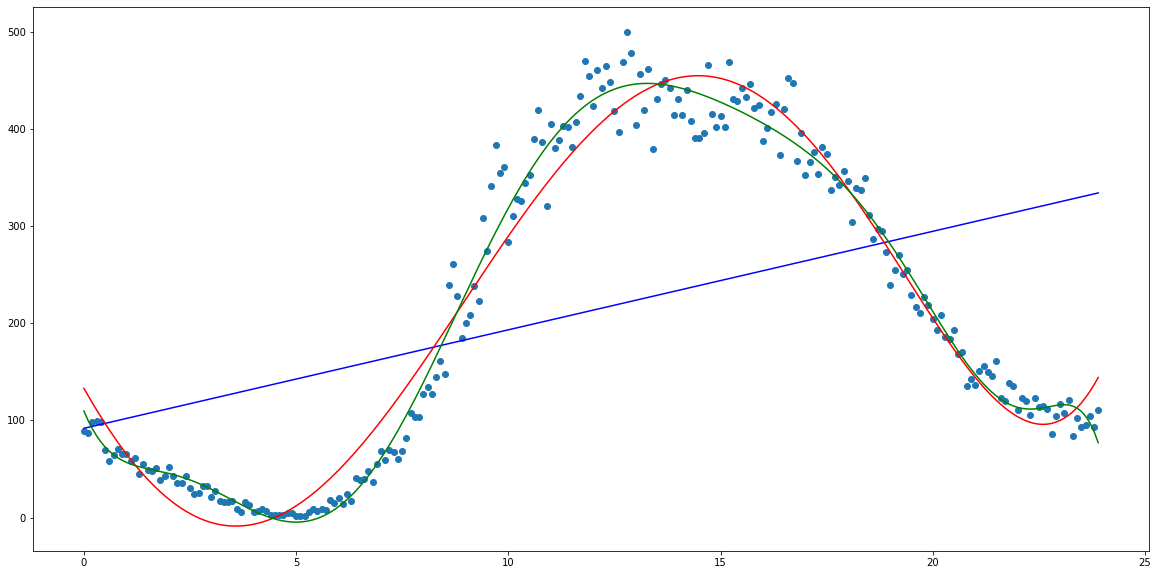

In [40]:
saturday_df = pd.Series.dropna(saturday_df, axis = 0)
a = saturday_df.index.values.reshape(-1,1)
b = saturday_df

plt.scatter(a,b)

# Model 1 - Linear Regression

linearab = linear_model.LinearRegression()

linearab.fit(a, b)
linearab.coef_, linearab.intercept_

plt.plot(a, a*linearab.coef_ + linearab.intercept_, c='b')

# Model 2 - 

poly = PolynomialFeatures(degree=5)

a_5 = poly.fit_transform(a.reshape(-1, 1))

linearab.fit(a_5, b)
(linearab.coef_, linearab.intercept_)

plt.plot(a, np.dot(a_5, linearab.coef_) + linearab.intercept_, c='r')

# Model 3 - 

poly1 = PolynomialFeatures(degree=10)

a_10 = poly1.fit_transform(a.reshape(-1, 1))

linearab.fit(a_10, b)
(linearab.coef_, linearab.intercept_)

plt.plot(a, np.dot(a_10, linearab.coef_) + linearab.intercept_, c='g')

Of the three models tried in step 2b - linear, 5th degree polynomial, and 10th degree polynomial - the 10th degree polynomial appears to be the best fit once again. The Capital Bike Share data for Saturdays decreases starting around midnight, peaking around 3PM, and then decreases once more through the end of the day, likely representing tourist activity. As with Mondays, the simple linear model doesn't represent the data well, showing a constant increase over time. The 5th and 10th degree polynomials both do a good job of modeling the Saturday data, the only difference being that the 5th degree polynomial suggests an sharp increase just before midnight. The 10th more accurately shows a very slow decline, making it the recommended model for the Saturday Capital Bike Share data as well.

## 3. (for both `monday` and `saturday`) Choose one of the polynomial models and create 3 new models fit to `hour_of_day` with different Ridge Regression $\alpha$ (alpha) Ridge Coefficient values


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.31829e-29): result may not be accurate.
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.63657e-28): result may not be accurate.
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.30711e-27): result may not be accurate.
  overwrite_a=True).T


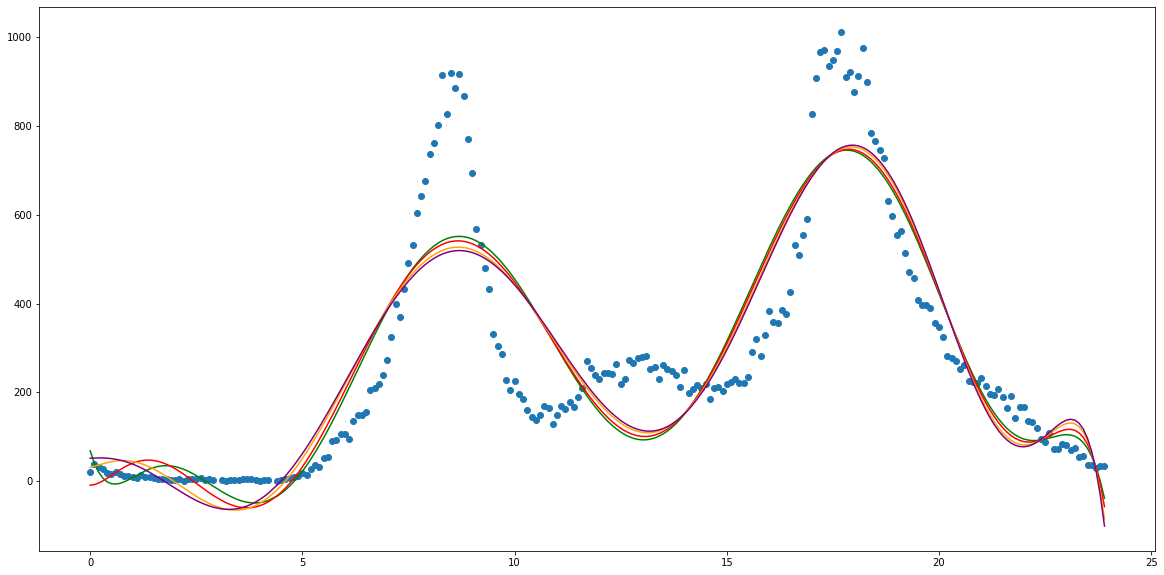

In [47]:
# Monday

plt.scatter(x, y)
plt.plot(x, np.dot(x_10, linearxy.coef_) + linearxy.intercept_, c='g')

# Ridge Model 1
ridgexy = linear_model.Ridge(alpha=.5)
ridgexy.fit(x_10, y)
ridgexy.coef_, ridgexy.intercept_

plt.plot(x, np.dot(x_10, ridgexy.coef_) + ridgexy.intercept_, c='r')

# Ridge model 2
ridgexy = linear_model.Ridge(alpha=10)
ridgexy.fit(x_10, y)
ridgexy.coef_, ridgexy.intercept_

plt.plot(x, np.dot(x_10, ridgexy.coef_) + ridgexy.intercept_, c='orange')

# Ridge Model 3
ridgexy = linear_model.Ridge(alpha=50)
ridgexy.fit(x_10, y)
ridgexy.coef_, ridgexy.intercept_

plt.plot(x, np.dot(x_10, ridgexy.coef_) + ridgexy.intercept_, c='purple')

After applying various values of alpha (0.5, 10, and 50) to the 10th degree polynomial model for Mondays, there isn't a ridge coefficient value that is immediately obvious as the best when compared to the non-regularized model. There is very little variance between each of the models, with most of the differences occuring in counts between hours 0 and 5 and then from 22 to 24. To balance accuracy and generalization, the model with ridge coefficient = 10 (though 50 is very similar). Relative to the non-regularized model and alpha = 0.5, alpha = 0 smooths out the count in the early morning hours, showing a relatively even decline, but it also adds a sharper local maximum after the evening rush, which the doesn't exactly mirror the data. Overall, any of the models (regularized or not) do a reasonably good job of modeling the Capital Bike Share data; the ridge coefficient of 10 adds a degree of generalizablity that might make it more applicable to additional data. 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.31596e-29): result may not be accurate.
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.63192e-28): result may not be accurate.
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.3063e-27): result may not be accurate.
  overwrite_a=True).T


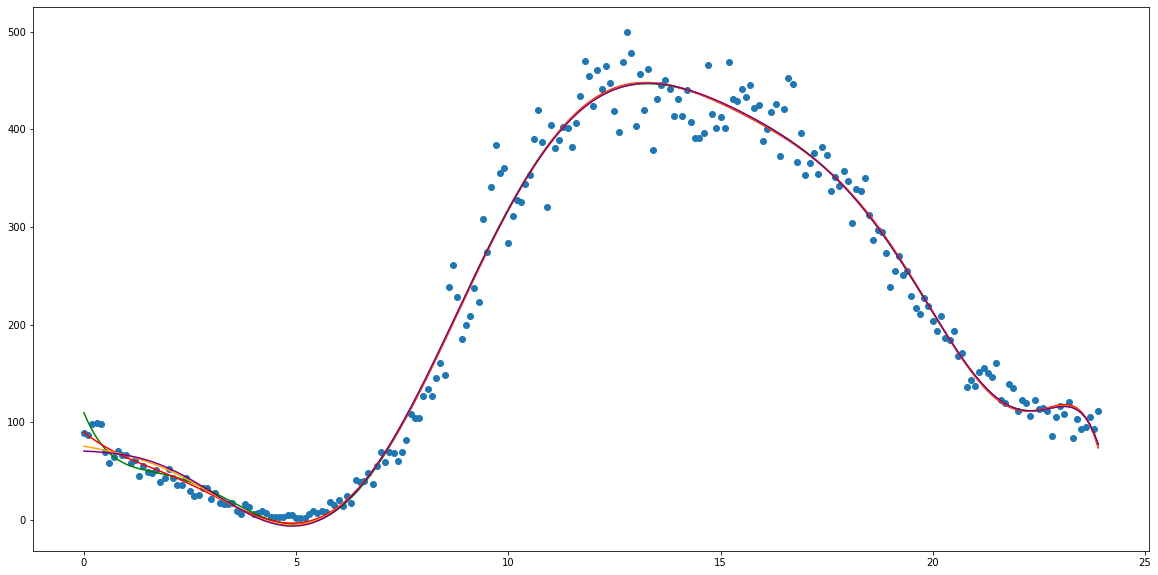

In [46]:
#Saturday
plt.scatter(a, b)
plt.plot(a, np.dot(a_10, linearab.coef_) + linearab.intercept_, c='g')

# Ridge Model 1
ridgeab = linear_model.Ridge(alpha=.5)
ridgeab.fit(a_10, b)
ridgeab.coef_, ridgeab.intercept_

plt.plot(a, np.dot(a_10, ridgeab.coef_) + ridgeab.intercept_, c='r')

# Ridge model 2
ridgeab = linear_model.Ridge(alpha=10)
ridgeab.fit(a_10, b)
ridgeab.coef_, ridgeab.intercept_

plt.plot(a, np.dot(a_10, ridgeab.coef_) + ridgeab.intercept_, c='orange')

# Ridge Model 3
ridgeab = linear_model.Ridge(alpha=50)
ridgeab.fit(a_10, b)
ridgeab.coef_, ridgeab.intercept_

plt.plot(a, np.dot(a_10, ridgeab.coef_) + ridgeab.intercept_, c='purple')

After applying the same values of alpha to the 10th degree polynomial model for Saturdays, we come to a similar conclusion. There isn't a single model that stands out as best among those tested. There is very little variance between each of the models (regularized and not), with most of the differences occuring in counts during the first two hours of the day. More data would be helpful to determine which is most accurate, but for the sake of the exercise, the model with ridge coefficient = 0.5 appears to be the best. It generalizes the data, avoiding the overfitting that the non-regularized data (the green line) could be prone to. The models with coefficients = 10 and 50 appear to over generalize, showing a lower slope than the data during that time suggest. Overall, as with Mondays, any of the Saturday models (regularized or not) do a reasonably good job of modeling the Capital Bike Share data; the ridge coefficient of 0.5 adds a degree of generalizablity that might make it more applicable to additional data. 